<a href="https://colab.research.google.com/github/abebual/Timeliness_analysis/blob/master/Timeliness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Rapid Timeliness Analysis of the Contingency Budget Transfer / Utilization**

In [0]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  3 17:45:00 2019

@author: abebual
"""

'\nCreated on Tue Sep  3 17:45:00 2019\n\n@author: abebual\n'

In [0]:
import csv
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sys

In [0]:
path='C:/Users/abebu/Dropbox/World Bank/Rapid Timeliness Analysis/Data/'
os.chdir(path)

In [0]:
print(os.getcwd())

C:\Users\abebu\Dropbox\World Bank\Rapid Timeliness Analysis\Data


In [0]:
v2=pd.read_csv('v2.csv')

In [0]:
v3=pd.read_csv('v3.csv')

In [0]:
v3.head()

,interview__key,interview__id,Region,zone,Woreda,Kebele,Kebele_Type,Community,Household_Code,Categoty,...,GPS_final__Latitude,GPS_final__Longitude,GPS_final__Accuracy,GPS_final__Altitude,GPS_final__Timestamp,sssys_irnd,has__errors,interview__status,e_payment,ngo
0,14-65-25-95,0069651b347f4031ad0721bb3c267d40,Somali,Jarar,Gashamo,zero 2,Near to woreda center or with good transport l...,zero 2,152,Extended PSNP,...,8.1192391,45.34898985,7,785,2019-06-28T14:41:13,0.553177,0,ApprovedByHeadquarters,0,0
1,00-58-29-77,00d5dac042a541ef91b5884e7d3631e0,Oromia,East Shewa,Fantale,Gara dima,Remote kebele,Bandira,610,Emergency clients,...,8.71148333333333,39.82586,6.09999990463257,1069.1,2019-06-22T11:41:32,0.764344,0,ApprovedByHeadquarters,0,0
2,05-15-52-84,00e3e5748d4a4564bcbecab893f3dc13,Amhara,North Wello,Raya Kobo,039 tekulesh,Remote kebele,addis alem /walwoy,12,Emergency clients,...,12.14910852,39.47851415,47,2176,2019-06-27T09:47:26,0.071127,0,ApprovedByHeadquarters,0,0
3,85-31-57-39,01a0df7b04e641af88e6cd2754221ac6,Oromia,N/Shewa,Wachale,Bosoke jate,Near to woreda center or with good transport l...,Udo,92,Emergency clients,...,9.483549999999999,38.8769416666667,7.90000009536743,2552.9,2019-06-30T04:49:36,0.378713,0,ApprovedByHeadquarters,0,0
4,85-74-33-94,0233e7d7e34342599740392e57e39de2,SNNP,Hadiya,Mirab Badawacho,Wobara,Near to woreda center or with good transport l...,Ketena 3,7-21-1-21-3/32,Emergency clients,...,7.14476459,37.86211524,13,1895,2019-06-27T11:26:30,0.487199,0,ApprovedByHeadquarters,1,0


In [0]:
v2.append(v3, ignore_index=True, sort=False)

,interview__key,interview__id,Region,zone,Woreda,Kebele,Kebele_Type,Community,Household_Code,Categoty,...,GPS_final__Altitude,GPS_final__Timestamp,sssys_irnd,has__errors,interview__status,e_pyment,ngo,hhSize,rounds,e_payment
0,20-82-15-16,0050c2a311d84a73b67b4f8706cac511,Tigray,Eastern,KilteAwelaelo,tahetay Adi kesanded,Near to woreda center or with good transport l...,laely wukero,74,Emergency clients,...,2007,2019-06-10T10:11:31,0.857276,0,ApprovedByHeadquarters,0.0,0,NaN,NaN,NaN
1,31-01-87-90,04e36e6a80364515817d03b83d77dce9,Tigray,Central,LaelayMachew,Adi tshafi,Remote kebele,Adi tsehafi,50,Emergency clients,...,2158,2019-06-15T11:06:29,0.391574,0,ApprovedByHeadquarters,1.0,0,NaN,NaN,NaN
2,99-17-21-07,07a8ab1fe91148cba4904ba768369eaf,Tigray,Eastern,KilteAwelaelo,Tahtay Adiksanded,Near to woreda center or with good transport l...,Laelay Wkro,139,Emergency clients,...,2013,2019-06-10T09:10:29,0.239945,0,ApprovedByHeadquarters,0.0,0,NaN,NaN,NaN
3,22-08-17-14,09ce1dfd33c545f8895df5b138073b38,Tigray,Central,LaelayMachew,htsebo,Near to woreda center or with good transport l...,semeret,265,Emergency clients,...,2127,2019-06-16T10:21:11,0.256070,0,ApprovedByHeadquarters,1.0,0,NaN,NaN,NaN
4,90-31-40-64,0a600d67d8f44aa496226f866288dd11,Tigray,Eastern,KilteAwelaelo,Hadnet,Remote kebele,Tsebat,270,Emergency clients,...,2238,2019-06-11T08:28:11,0.249295,0,ApprovedByHeadquarters,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,63-27-38-41,fe3d1de0d3d14d9c98ed596b1eeba0fc,Oromia,N/Shewa,Wachale,Mechala werto,Near to woreda center or with good transport l...,Temame,72,Emergency clients,...,2771.2,2019-06-30T10:38:44,0.301226,0,ApprovedByHeadquarters,NaN,0,4.0,5.0,0.0
598,24-79-43-62,fec20ff4820244f78ee4b5de54a55f00,Oromia,East Shewa,Fantale,kobo,Near to woreda center or with good transport l...,Muka bedena,131,Extended PSNP,...,951.8,2019-06-23T08:51:00,0.236586,0,ApprovedByHeadquarters,NaN,0,7.0,4.0,0.0
599,49-82-56-25,fef60e8440bf41f5acd9f355e885ab8c,Amhara,North Shewa,Menez Lalo,038 (Derew Kebelle),Near to woreda center or with good transport l...,Tenket Got metek Anjora,29,Emergency clients,...,2430.8,2019-07-11T11:59:46,0.642592,0,ApprovedByHeadquarters,NaN,0,7.0,3.0,0.0
600,28-84-78-88,ff3d0a4e3b7f4311b70848758c6c5dee,Oromia,N/Shewa,Debre Libanos,Enegotam,Remote kebele,Enegotam,331,Emergency clients,...,2201.5,2019-06-28T07:12:00,0.113342,0,ApprovedByHeadquarters,NaN,0,6.0,5.0,0.0


In [0]:
v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 80 columns):
interview__key              120 non-null object
interview__id               120 non-null object
Region                      120 non-null object
zone                        120 non-null object
Woreda                      120 non-null object
Kebele                      120 non-null object
Kebele_Type                 120 non-null object
Community                   120 non-null object
Household_Code              120 non-null int64
Categoty                    120 non-null object
time_Date                   120 non-null object
GPS__Latitude               120 non-null object
GPS__Longitude              120 non-null object
GPS__Accuracy               120 non-null object
GPS__Altitude               120 non-null object
GPS__Timestamp              120 non-null object
Interviewer_id              120 non-null object
Consent                     120 non-null object
gender                      120 

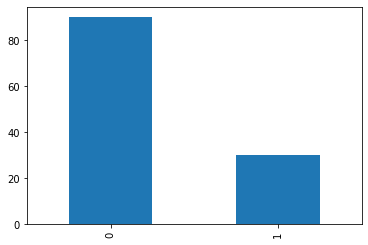

In [0]:
v2['ngo'].value_counts().plot(kind='bar')

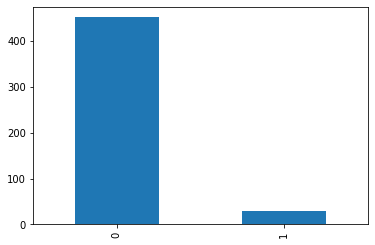

In [0]:
v3['ngo'].value_counts().plot(kind='bar')

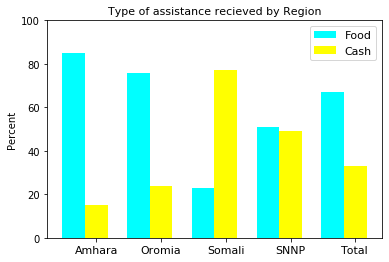

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Total']

fig = plt.figure()
ax = fig.add_subplot(111)

Food=[85,76,23,51,67]
rects_r1 = ax.bar(ind, Food, width, color='cyan')
Cash= [15,24,77,49,33]
rects_r2 = ax.bar(ind+width, Cash, width, color='yellow')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Total'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0]), 
          ('Food', 'Cash'), fontsize=11)
ax.set_title('Type of assistance recieved by Region', fontsize=11)

plt.show()


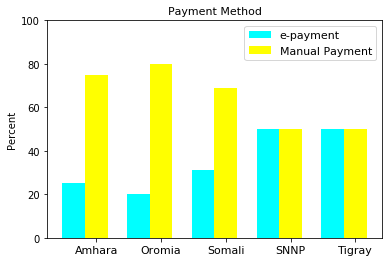

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Tigray']

fig = plt.figure()
ax = fig.add_subplot(111)

e_payment=[25,20,31,50,50]
rects_r1 = ax.bar(ind, e_payment, width, color='cyan')
Manual= [75,80,69,50,50]
rects_r2 = ax.bar(ind+width, Manual, width, color='yellow')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Tigray'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0]), 
          ('e-payment', 'Manual Payment'), fontsize=11)
ax.set_title('Payment Method', fontsize=11)

plt.show()

In [0]:
fig.savefig('e_payment.png')

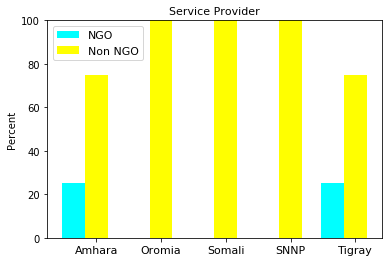

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Tigray']

fig = plt.figure()
ax = fig.add_subplot(111)

NGO=[25,0,0,0,25]
rects_r1 = ax.bar(ind, NGO, width, color='cyan')
Non_NGO= [75,100,100,100,75]
rects_r2 = ax.bar(ind+width, Non_NGO, width, color='yellow')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Tigray'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0]), 
          ('NGO', 'Non NGO'), fontsize=11)
ax.set_title('Service Provider', fontsize=11)

plt.show()

In [0]:
fig.savefig('service_provider.png')

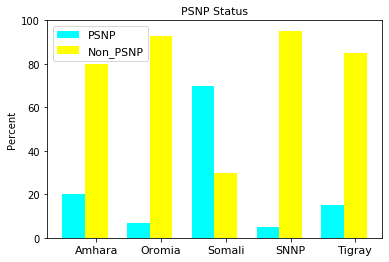

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Tigray']

fig = plt.figure()
ax = fig.add_subplot(111)

PSNP=[20,7,70,5,15]
rects_r1 = ax.bar(ind, PSNP, width, color='cyan')
Non_PSNP= [80,93,30,95,85]
rects_r2 = ax.bar(ind+width, Non_PSNP, width, color='yellow')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Tigray'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0]), 
          ('PSNP', 'Non_PSNP'), fontsize=11)
ax.set_title('PSNP Status', fontsize=11)

plt.show()

In [0]:
fig.savefig('PSNP Status.png')

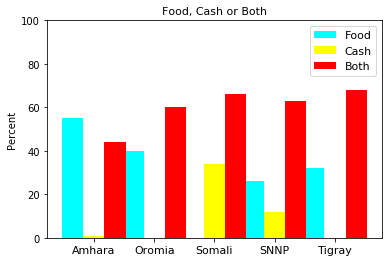

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Tigray']

fig = plt.figure()
ax = fig.add_subplot(111)

Food=[55,40,0,26,32]
rects_r1 = ax.bar(ind, Food, width, color='cyan')
Cash= [1,0,34,12,0]
rects_r2 = ax.bar(ind+width, Cash, width, color='yellow')
Both= [44,60,66,63,68]
rects_r3 = ax.bar(ind+width*2, Both, width, color='red')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Tigray'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0], rects_r3[0]), 
          ('Food', 'Cash', 'Both'), fontsize=11)
ax.set_title('Food, Cash or Both', fontsize=11)

plt.show()

In [0]:
fig.savefig('food_cash.png')

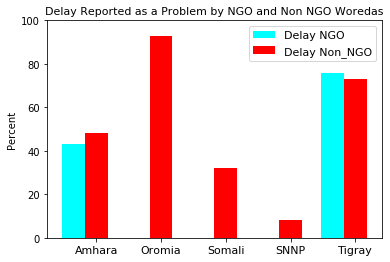

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Tigray']

fig = plt.figure()
ax = fig.add_subplot(111)

d_ngo=[43,0,0,0,76]
rects_r1 = ax.bar(ind, d_ngo, width, color='cyan')
d_n_ngo= [48,93,32,8,73]
rects_r2 = ax.bar(ind+width, d_n_ngo, width, color='red')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Tigray'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0]), 
          ('Delay NGO', 'Delay Non_NGO'), fontsize=11)
ax.set_title('Delay Reported as a Problem by NGO and Non NGO Woredas', fontsize=11)

plt.show()

In [0]:
fig.savefig('delay_serviceProvider.png')

In [0]:
""" C_13 What problem does your household faces while collecting cash or 
food assistance from the Programme """

region = ['Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray']
Prob1 = [41, 42, 66, 45, 60]
Prob2 = [58, 59, 23, 64, 59]
Prob3 = [13, 41, 1, 10, 1]
ProbOth = [10, 8, 0, 1, 0]
Total = [122, 150, 90, 120, 120]

np_Prob1= np.array(Prob1)
np_Prob2 = np.array(Prob2)
np_Prob3 = np.array(Prob3)
np_ProbOth = np.array(ProbOth)
np_Total= np.array(Total)
perc_Prob1= np.array(np_Prob1 / np_Total)* 100
perc_Prob2= np.array(np_Prob2/np_Total)* 100
perc_Prob3= np.array(np_Prob3/ np_Total)* 100
perc_ProbOth = np.array(np_ProbOth/ np_Total)* 100


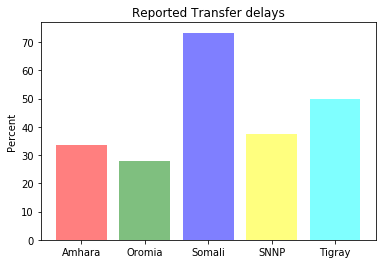

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, perc_Prob1, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Reported Transfer delays')
plt.figure(figsize=(40,20))

plt.show()
plt.savefig('delay.png')


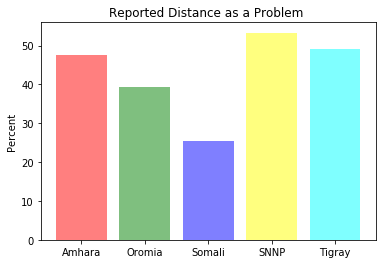

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, perc_Prob2, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Reported Distance as a Problem ')

plt.show()


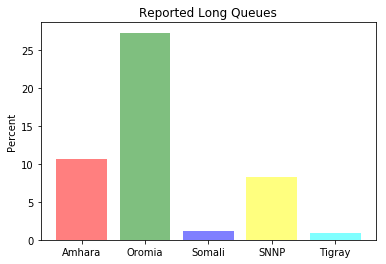

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, perc_Prob3, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Reported Long Queues')

plt.show()
plt.savefig('queues.png')


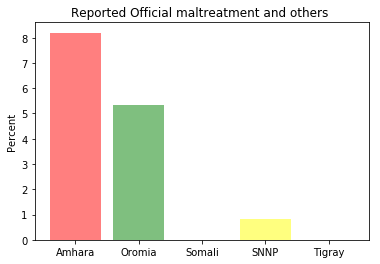

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, perc_ProbOth, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Reported Official maltreatment and others ')

plt.show()
plt.savefig('others.png')


In [0]:
# C_14a What was the reason for the delay?

# reason for delay dataset

delay1 = [2, 14, 4, 0, 10]
delay2 = [4, 35, 16, 6, 47]
delay3 = [5, 24, 1, 5, 0]
delay5 = [3, 17, 5, 0, 41]
delayOth = [4, 1, 0, 0, 0]
#Total_delay = [18, 91, 21, 11, 98]
Total_delay = [57, 139, 29, 9, 89]

np_delay1= np.array(delay1)
np_delay2 = np.array(delay2)
np_delay3 = np.array(delay3)
np_delay5 = np.array(delay5)
np_delayOth = np.array(delayOth)
np_Total_delay= np.array(Total_delay)
pct_delay1= np.array(np_delay1 / np_Total_delay)* 100
pct_delay2= np.array(np_delay2/np_Total_delay)* 100
pct_delay3= np.array(np_delay3/ np_Total_delay)* 100
pct_delay5= np.array(np_delay5/ np_Total_delay)* 100
pct_delayOth = np.array(np_delayOth/ np_Total_delay)* 100



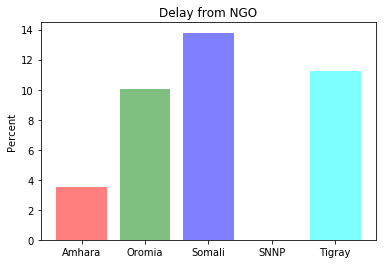

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, pct_delay1, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Delay from NGO')
plt.figure(figsize=(40,20))

plt.show()
plt.savefig('ngo.png')

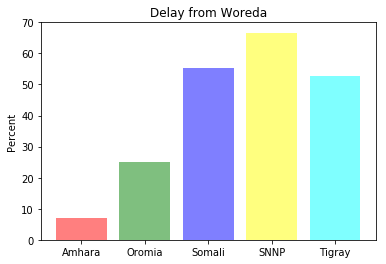

<Figure size 2880x1440 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, pct_delay2, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Delay from Woreda')
plt.figure(figsize=(40,20))

plt.show()


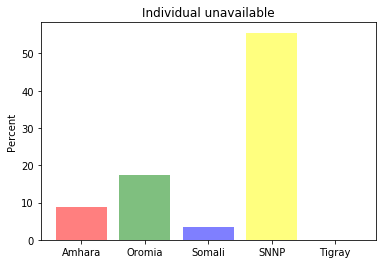

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, pct_delay3, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Individual unavailable')
plt.figure(figsize=(40,20))

plt.show()
plt.savefig('individual.png')


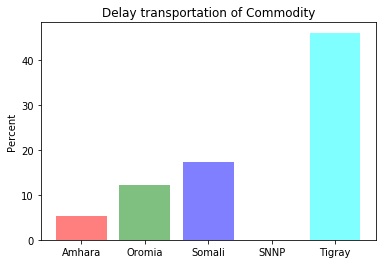

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, pct_delay5, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Delay transportation of Commodity')
plt.figure(figsize=(40,20))

plt.show()
plt.savefig('transportation.png')

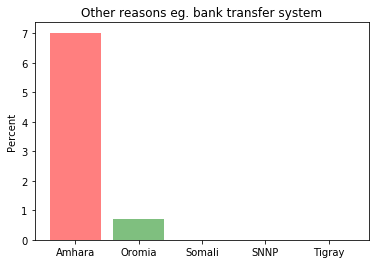

<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
y_pos = np.arange(len(region))
plt.bar(y_pos, pct_delayOth, align='center', alpha=0.5, color=('red', 'green', 'blue', 'yellow', 'cyan'))
plt.xticks(y_pos, region)
plt.ylabel('Percent')
plt.title('Other reasons eg. bank transfer system')
plt.figure(figsize=(40,20))

plt.show()
plt.savefig('other.png')


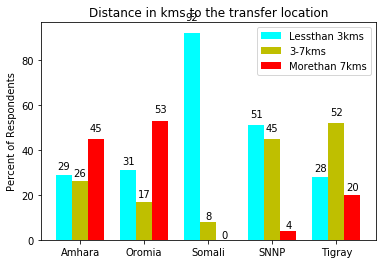

In [0]:
# distance and time to collect transfers 

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.25      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

dist1 = [29, 31, 92, 51, 28]
rects1 = ax.bar(ind, dist1, width, color='cyan')
dist2 = [26, 17, 8, 45, 52]
rects2 = ax.bar(ind+width, dist2, width, color='y')
dist3 = [45, 53, 0, 4, 20]
rects3 = ax.bar(ind+width*2, dist3, width, color='r')

ax.set_ylabel('Percent of Respondents')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray'))
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Lessthan 3kms', '3-7kms', 'Morethan 7kms') )
ax.set_title('Distance in kms to the transfer location')
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


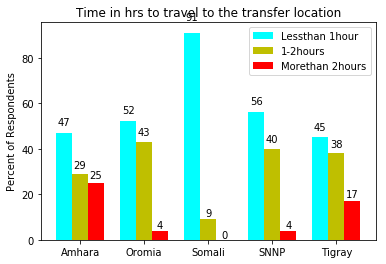

In [0]:
#Time took to travel to payment location by Region

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

time1 = [47, 52, 91, 56, 45]
rects_t1 = ax.bar(ind, time1, width, color='cyan')
time2 = [29, 43, 9, 40, 38]
rects_t2 = ax.bar(ind+width, time2, width, color='y')
time3 = [25, 4, 0, 4, 17]
rects_t3 = ax.bar(ind+width*2, time3, width, color='r')

ax.set_ylabel('Percent of Respondents')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray'))
ax.legend( (rects_t1[0], rects_t2[0], rects_t3[0]), ('Lessthan 1hour', '1-2hours', 'Morethan 2hours') )
ax.set_title('Time in hrs to travel to the transfer location')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects_t1)
autolabel(rects_t2)
autolabel(rects_t3)

plt.show()


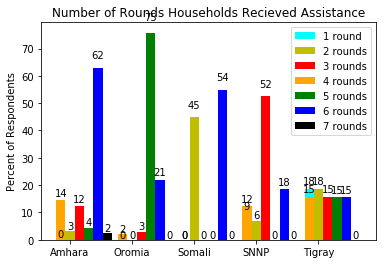

In [0]:
# the number of rounds households recieved assistants 

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rounds_1 = [0.17, 0.00 , 0.00 , 9.85 , 18.58] 
rects_r1 = ax.bar(ind, rounds_1, width, color='cyan')
rounds_2 = [3.14 ,  0.00, 45.07,  6.77, 18.58 ]
rects_r2 = ax.bar(ind+width, rounds_2, width, color='y')
rounds_3 = [ 12.54 , 3.00 ,  0.00, 52.62 ,  15.79 ]
rects_r3 = ax.bar(ind+width*2, rounds_3, width, color='r')
rounds_4 = [14.63, 2.07 , 0.00 , 12.31 , 15.79] 
rects_r4 = ax.bar(ind, rounds_4, width, color='orange')
rounds_5 = [4.36 ,  75.78, 00.00,  0.00, 15.63]
rects_r5 = ax.bar(ind+width*3, rounds_5, width, color='green')
rounds_6 = [ 62.72 , 21.76 ,  54.93, 18.46 ,  15.63 ]
rects_r6 = ax.bar(ind+width*4, rounds_6, width, color='blue')
rounds_7 = [ 2.44 , 0.00 ,  0.00, 0.00 ,   0.00 ]
rects_r7 = ax.bar(ind+width*5, rounds_7, width, color='black')

ax.set_ylabel('Percent of Respondents')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray'))
ax.legend( (rects_r1[0], rects_r2[0], rects_r3[0], rects_r4[0], rects_r5[0], rects_r6[0], rects_r7[0]), 
          ('1 round', '2 rounds', '3 rounds', '4 rounds', '5 rounds', '6 rounds', '7 rounds'))
ax.set_title('Number of Rounds Households Recieved Assistance')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
               ha='center', va='bottom')

autolabel(rects_r1)
autolabel(rects_r2)
autolabel(rects_r3)
autolabel(rects_r4)
autolabel(rects_r5)
autolabel(rects_r6)
autolabel(rects_r7)

plt.show()


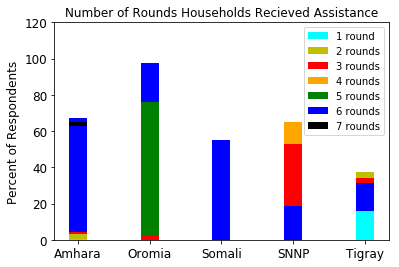

In [0]:
# above stacked bar 

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars
rounds_1 = [0.17, 0.00 , 0.00 , 9.85 , 18.58] 
rounds_2 = [3.14 ,  0.00, 45.07,  6.77, 18.58 ]
rounds_3 = [ 12.54 , 3.00 ,  0.00, 52.62 ,  15.79 ]
rounds_4 = [14.63, 2.07 , 0.00 , 12.31 , 15.79]
rounds_5 = [4.36 ,  75.78, 00.00,  0.00, 15.63]
rounds_6 = [ 62.72 , 21.76 ,  54.93, 18.46 ,  15.63 ]
rounds_7 = [ 2.44 , 0.00 ,  0.00, 0.00 ,   0.00 ]


#fig = plt.figure()
#ax = fig.add_subplot(111)


p1 = plt.bar(ind, rounds_1, width, color='cyan')
p2 = plt.bar(ind, rounds_2, width, bottom=rounds_1, color='y')
p3 = plt.bar(ind, rounds_3, width,   bottom=rounds_2, color='r')
p4 = plt.bar(ind, rounds_4, width,   bottom=rounds_3, color='orange')
p5 = plt.bar(ind, rounds_5, width,   bottom=rounds_4, color='green')
p6 = plt.bar(ind, rounds_6, width,  bottom=rounds_5, color='blue')
p7 = plt.bar(ind, rounds_7, width,   bottom=rounds_6, color='black')

plt.ylabel('Percent of Respondents', fontsize=12)
plt.xticks(ind, region, fontsize=12)
#plt.xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray'))
plt.ylim([0,120])
plt.yticks(fontsize=12)


plt.legend( (rects_r1[0], rects_r2[0], rects_r3[0], rects_r4[0], rects_r5[0], rects_r6[0], rects_r7[0]), 
          ('1 round', '2 rounds', '3 rounds', '4 rounds', '5 rounds', '6 rounds', '7 rounds'))
plt.title('Number of Rounds Households Recieved Assistance')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()

autolabel(p1)
autolabel(p2)
autolabel(p3)
autolabel(p4)
autolabel(p5)
autolabel(p6)
autolabel(p7)



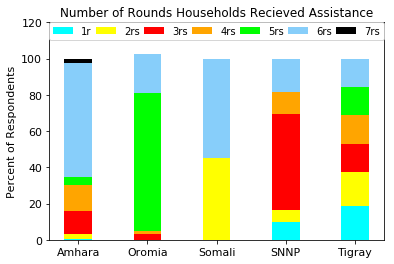

In [0]:
# above stacked bar 100%


N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.40       # the width of the bars
rounds_1 = [0.17, 0.00 , 0.00 , 9.85 , 18.58] 
rounds_2 = [3.14 ,  0.00, 45.07,  6.77, 18.58 ]
rounds_3 = [ 12.54 , 3.00 ,  0.00, 52.62 ,  15.79 ]
rounds_4 = [14.63, 2.07 , 0.00 , 12.31 , 15.79]
rounds_5 = [4.36 ,  75.78, 00.00,  0.00, 15.63]
rounds_6 = [ 62.72 , 21.76 ,  54.93, 18.46 ,  15.63 ]
rounds_7 = [ 2.44 , 0.00 ,  0.00, 0.00 ,   0.00 ]


#You need the bottom of each dataset to be the sum of all the datasets that came before. 
#you may also need to convert the datasets to numpy arrays to add them together.)
np_rounds_1 = np.array(rounds_1)
np_rounds_2  = np.array(rounds_2)
np_rounds_3  = np.array(rounds_3)
np_rounds_4  = np.array(rounds_4)
np_rounds_5  = np.array(rounds_5)
np_rounds_6  = np.array(rounds_6)
np_rounds_7  = np.array(rounds_7)

rects_1 = plt.bar(ind, rounds_1, width, color='cyan')
rects_2 = plt.bar(ind, rounds_2, width, bottom=rounds_1, color='yellow')
rects_3 = plt.bar(ind, rounds_3, width, bottom=np_rounds_1 + np_rounds_2, color='r')
rects_4 = plt.bar(ind, rounds_4, width, bottom=np_rounds_1 + np_rounds_2 + np_rounds_3, color='orange')
rects_5 = plt.bar(ind, rounds_5, width, bottom=np_rounds_1 + np_rounds_2 + np_rounds_3 + np_rounds_4, color='lime')
rects_6 = plt.bar(ind, rounds_6, width, bottom=np_rounds_1 + np_rounds_2 + np_rounds_3 + np_rounds_4 + np_rounds_5, color='lightskyblue')
rects_7 = plt.bar(ind, rounds_7, width, bottom=np_rounds_1 + np_rounds_2 + np_rounds_3 + np_rounds_4 + np_rounds_5 + np_rounds_6, color='black')

plt.ylabel('Percent of Respondents', fontsize=11)
plt.xticks(ind, region, fontsize=11)
#plt.xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray'))
plt.ylim([0,120])
plt.yticks(fontsize=11)

plt.legend( (rects_1[0], rects_2[0], rects_3[0], rects_4[0], rects_5[0], rects_6[0], rects_7[0]), 
          ('1r', '2rs', '3rs', '4rs', '5rs', '6rs', '7rs'), loc=2,
           ncol=7, mode="expand", borderaxespad=0. )

plt.title('Number of Rounds Households Recieved Assistance', fontsize=12)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
               ha='center', va='bottom')

autolabel(rects_1)
autolabel(rects_2)
autolabel(rects_3)
autolabel(rects_4)
autolabel(rects_5)
autolabel(rects_6)
autolabel(rects_7)

plt.show()


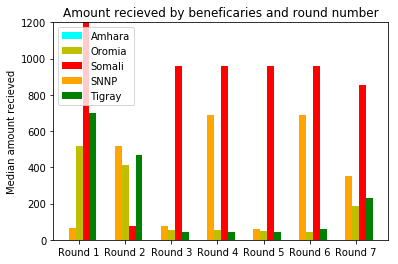

In [0]:
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.15     # the width of the bars
Rounds= [1,2,3,4,5,6,7]

np_amhara = np.array(Amhara)
np_oromia  = np.array(Oromia)
np_somali  = np.array(Somali)
np_snnp  = np.array(SNNP)
np_tigray  = np.array(Tigray)


fig = plt.figure()
ax = fig.add_subplot(111)

Amhara=[30,30,30,60,30,30,35]
rects_r1 = ax.bar(ind, Amhara, width, color='cyan')
Oromia=[520,415,52,53,50,45,189]
rects_r2 = ax.bar(ind+width, Oromia, width, color='y')
Somali=[1200,75,960,960,960,960,853]
rects_r3 = ax.bar(ind+width*2, Somali, width, color='r')
SNNP=[65,520,75,690,60,690,350]
rects_r4 = ax.bar(ind, SNNP, width, color='orange')
Tigray=[700,470,45,45,45,60,228]
rects_r5 = ax.bar(ind+width*3, Tigray, width, color='green')

ax.set_ylabel('Median amount recieved')
ax.set_xticks(ind+width)
ax.set_ylim(0, 1200)
ax.set_xticklabels(('Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 6', 'Round 7'))
ax.legend( (rects_r1[0], rects_r2[0], rects_r3[0], rects_r4[0], rects_r5[0]), 
          ('Amhara', 'Oromia', 'Somali', 'SNNP', 'Tigray'))
ax.set_title('Amount recieved by beneficaries and round number')
"""
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
               ha='center', va='bottom')

autolabel(rects_r1)
autolabel(rects_r2)
autolabel(rects_r3)
autolabel(rects_r4)
autolabel(rects_r5)

"""
plt.show()


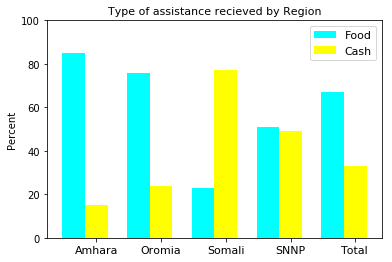

In [0]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.35    # the width of the bars
Region= ['Amhara', 'Oromia', 'Somali', 'SNNP','Total']

fig = plt.figure()
ax = fig.add_subplot(111)

Food=[85,76,23,51,67]
rects_r1 = ax.bar(ind, Food, width, color='cyan')
Cash= [15,24,77,49,33]
rects_r2 = ax.bar(ind+width, Cash, width, color='yellow')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_ylim(0, 100)
ax.set_xticklabels(('Amhara', 'Oromia', 'Somali', 'SNNP','Total'), fontsize=11)
ax.legend( (rects_r1[0], rects_r2[0]), 
          ('Food', 'Cash'), fontsize=11)
ax.set_title('Type of assistance recieved by Region', fontsize=11)

plt.show()